In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64>

# (Drop missing values)

In [7]:
df = df.dropna()
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# label encoding

In [9]:
df = df.replace({"Loan_Status":{"N":0,"Y":1}})

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
df.shape

(480, 13)

In [12]:
df["Dependents"].value_counts() 

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
#replacing the value of 3+ to 4

df = df.replace(to_replace='3+',value=4)

In [14]:
df["Dependents"].value_counts() 

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# data visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

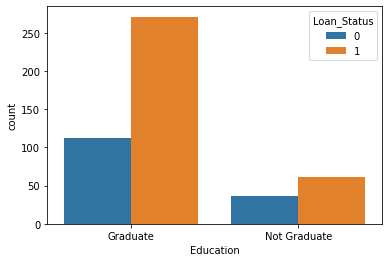

In [15]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

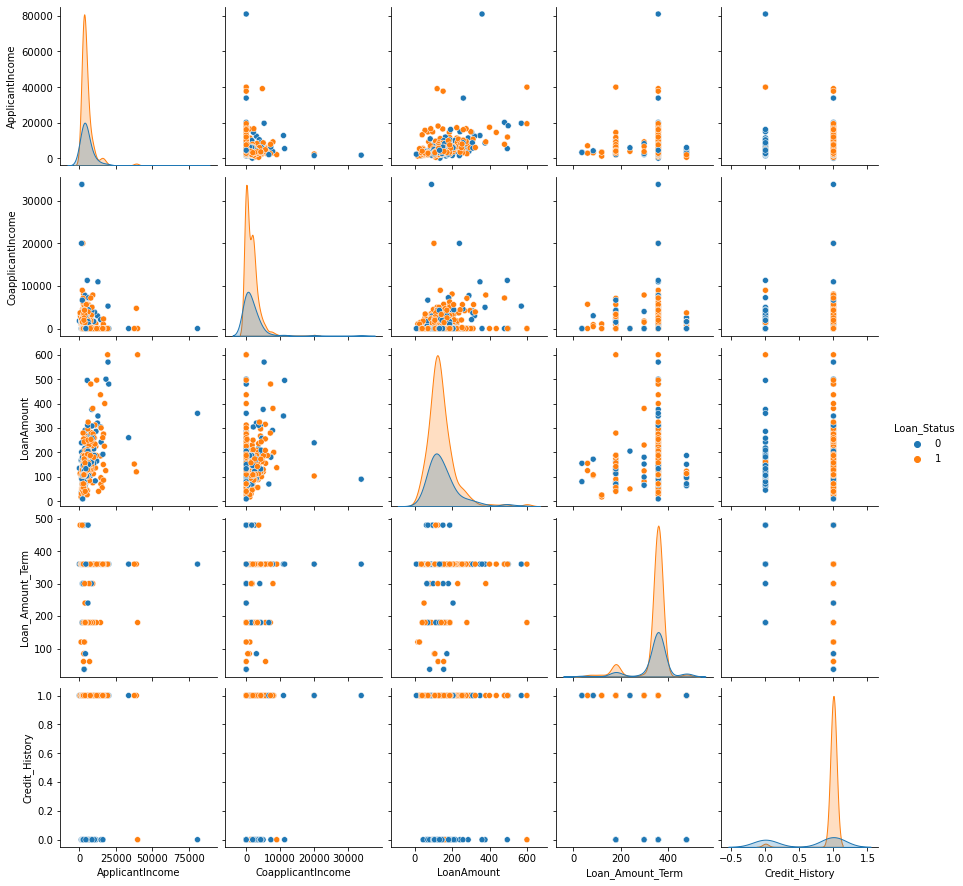

In [16]:
sns.pairplot(df,hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

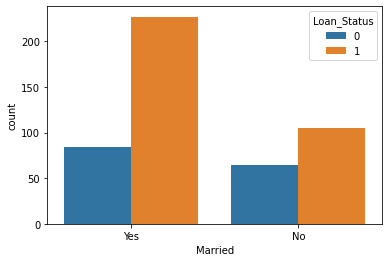

In [17]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df = df.replace({'Gender':{'Male':0,'Female':0}})
df = df.replace({'Married':{'Yes':1,'No':0}})
df = df.replace({'Education':{'Graduate':1,'Not Graduate':0}})
df = df.replace({'Property_Area':{'Graduate':1,'Not Graduate':0}})
df = df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}})
df = df.replace({'Self_Employed':{'No':0,'Yes':1}})




In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [22]:
print(X)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [24]:
print(X.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


# Training model

In [25]:
cl = SVC(kernel='linear')

In [26]:
cl.fit(x_train,y_train)

SVC(kernel='linear')

In [27]:
x_train_prediction = cl.predict(x_train)

In [28]:
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [29]:
print('Training accuracy score:',training_data_accuracy)

accuracy score: 0.7708333333333334


In [30]:
x_test_prediction = cl.predict(x_test)

In [31]:
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [32]:
print('Test accuracy score:',test_data_accuracy)

Test accuracy score: 0.8541666666666666


In [34]:
print(classification_report(x_train_prediction,y_train))

              precision    recall  f1-score   support

           0       0.35      0.79      0.48        58
           1       0.96      0.77      0.85       374

    accuracy                           0.77       432
   macro avg       0.65      0.78      0.67       432
weighted avg       0.88      0.77      0.80       432



In [35]:
print(classification_report(x_test_prediction,y_test))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       1.00      0.82      0.90        40

    accuracy                           0.85        48
   macro avg       0.77      0.91      0.80        48
weighted avg       0.92      0.85      0.87        48



# making predictive system